<a href="https://colab.research.google.com/github/arnab-95/Bitcoin_Price_Prediction/blob/main/appliance_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 6.3 kB/s 
     |████████████████████████████████| 578.1 MB 29 kB/s 
     |████████████████████████████████| 578.0 MB 15 kB/s 
     |████████████████████████████████| 511.8 MB 25 kB/s 


In [ ]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus=tf.config.experimental.list_physical_devices('TPU')

In [ ]:
gpus

[]

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.data.Dataset??

2. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_dir='/content/gdrive/MyDrive/Wifi_Board_Data_Collection'

In [ ]:
pwd

'/content'

In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)

Fan
Dryer
Laptop


In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=5)

Found 201 files belonging to 3 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
#Images represented as numpy arrays
batch[0].shape

(5, 256, 256, 3)

In [ ]:
#Class 0 = Dishwasher, Class 1 = Dryer, Class 2 = Fan

batch[1]

array([0, 0, 0, 1, 0], dtype=int32)

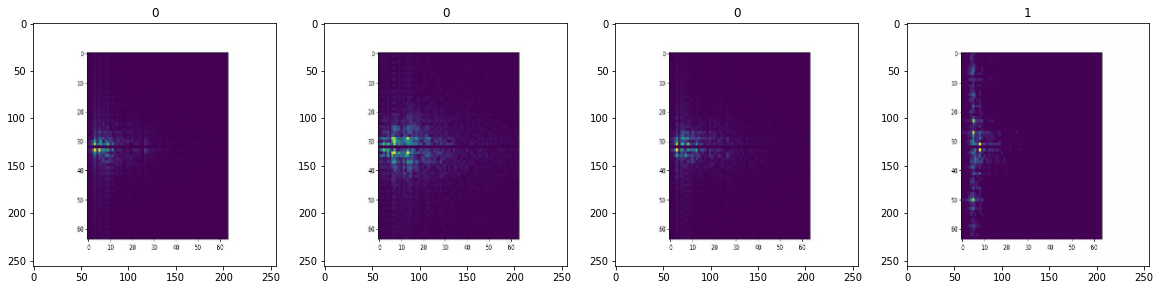

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled=batch[0]/255

In [ ]:
scaled.max()

1.0

3. Preprocess Data


In [ ]:
data=data.map(lambda x,y:(x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

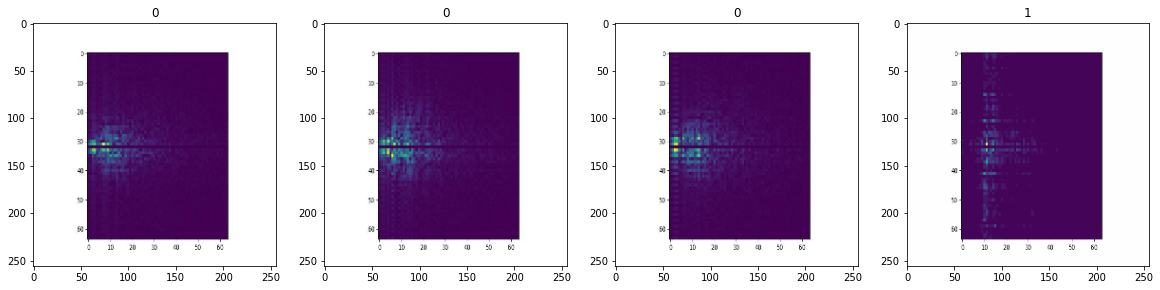

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

41

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size= int(len(data)*.1)+1


In [ ]:
train_size+val_size+test_size

41

In [ ]:
train = data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

4. Deep Learning


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPool2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 30, 30, 16)      

5. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
28/28 [==============================] - 18s 581ms/step - loss: 0.7966 - accuracy: 0.4286 - val_loss: 0.6868 - val_accuracy: 0.6500
Epoch 2/20
28/28 [==============================] - 17s 603ms/step - loss: 0.6930 - accuracy: 0.5500 - val_loss: 0.6824 - val_accuracy: 0.5250
Epoch 3/20
28/28 [==============================] - 16s 569ms/step - loss: 0.6859 - accuracy: 0.6000 - val_loss: 0.7568 - val_accuracy: 0.5000
Epoch 4/20
28/28 [==============================] - 14s 494ms/step - loss: 0.5102 - accuracy: 0.7714 - val_loss: 0.0286 - val_accuracy: 0.9500
Epoch 5/20
28/28 [==============================] - 16s 552ms/step - loss: -0.0328 - accuracy: 0.7929 - val_loss: 0.4947 - val_accuracy: 0.7500
Epoch 6/20
28/28 [==============================] - 14s 490ms/step - loss: -0.5653 - accuracy: 0.8500 - val_loss: 1.0865 - val_accuracy: 0.7750
Epoch 7/20
28/28 [==============================] - 17s 584ms/step - loss: -0.7511 - accuracy: 0.8286 - val_loss: -0.8714 - val_accuracy: 0.

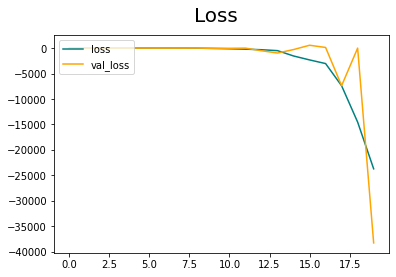

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

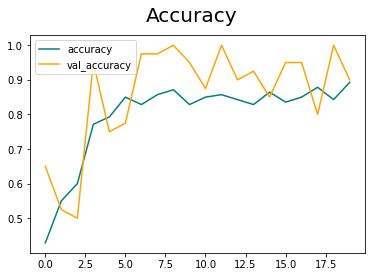

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

6. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat=model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

  


NameError: ignored

In [ ]:
print(f'Precision: { pre.result().numpy()}, Recall : {re.result().numpy()} , Accuracy : {acc.result().numpy()}')

Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'appliance_classification.h5'))

In [ ]:
new_model=load_model(os.path.join('models', 'appliance_classification.h5'))